# Kalkulator wyciskania na ławce podczas zarejestrowanych zawodów w trójboju siłowym

## 1 Import bibliotek i pobranie ramki danych
Import niezbędnych bibliotek:
- pandas w celu wczytania ramki danych oraz operacji na niej 
- scipy z której zostaną pobrane przeprowadzone testy statystyczne

In [730]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


Pobranie danych ze strony https://www.openpowerlifting.org/ dnia 22.12.2023 <br>
Dane dotyczą wyników dotyczących trójboju siłowego, zawodów ogranozowanych w tym sporcie, a strona zbiera wyniki z zawodów organizowanych przez większość większych organizacji na świecie

In [731]:
df = pd.read_csv('Powerlifting.csv')

C:\Users\Szymon\AppData\Local\Temp\ipykernel_10376\727205944.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wunsz.csv')


## 2 Edacja danych w celu przystosowania ich do modelu

In [732]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [733]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1.961325e+06,2.991949e+06,896686.000000,887493.000000,863733.000000,8437.000000,2.024312e+06,1.380328e+06,1.364791e+06,1.322626e+06,...,1.012203e+06,994618.000000,954242.000000,22901.000000,2.195983e+06,2.828341e+06,2.803444e+06,2.803444e+06,2.803444e+06,2.555446e+06
mean,3.077018e+01,8.417019e+01,115.299809,99.409698,40.917137,76.708478,1.744553e+02,8.364751e+01,5.752940e+01,-1.475474e+01,...,1.599116e+02,134.095018,23.761011,80.495881,1.900779e+02,3.782585e+02,2.753803e+02,2.742879e+02,2.584410e+02,6.452862e+01
std,1.321295e+01,2.263327e+01,136.531214,160.524582,190.444937,179.811958,6.840240e+01,9.805345e+01,1.228357e+02,1.386443e+02,...,1.073724e+02,155.065803,210.919199,186.054084,6.203827e+01,2.055426e+02,1.291905e+02,1.286415e+02,1.222949e+02,1.628731e+01
min,0.000000e+00,1.000000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-5.080200e+02,-6.355000e+02,-6.355000e+02,-5.750000e+02,...,-5.000000e+02,-502.500000,-587.500000,-500.000000,-4.100000e+02,1.000000e+00,6.800000e-01,6.700000e-01,6.400000e-01,5.000000e-01
25%,2.050000e+01,6.720000e+01,90.000000,80.000000,-150.000000,-80.000000,1.225000e+02,5.750000e+01,-3.000000e+01,-1.325000e+02,...,1.250000e+02,117.500000,-200.000000,-75.000000,1.425000e+02,2.018500e+02,1.452300e+02,1.445900e+02,1.367700e+02,5.284000e+01
50%,2.750000e+01,8.195000e+01,145.000000,145.000000,117.500000,130.000000,1.700000e+02,1.025000e+02,9.500000e+01,-5.750000e+01,...,1.800000e+02,177.500000,125.000000,143.000000,1.900000e+02,3.560700e+02,2.980900e+02,2.970500e+02,2.771800e+02,6.443000e+01
75%,3.850000e+01,9.880000e+01,197.500000,202.500000,192.500000,195.000000,2.177200e+02,1.400000e+02,1.425000e+02,1.175000e+02,...,2.225000e+02,230.000000,205.000000,205.000000,2.350000e+02,5.350000e+02,3.730100e+02,3.712900e+02,3.515300e+02,7.584000e+01
max,9.800000e+01,3.000000e+02,555.000000,577.500000,595.000000,592.390000,5.950000e+02,5.510000e+02,5.216300e+02,6.355000e+02,...,4.500000e+02,467.500000,487.500000,440.500000,4.875000e+02,1.407500e+03,7.991100e+02,7.933300e+02,7.569000e+02,1.761300e+02


Wybór 6 parametrów które uznaliśmy za najistotniejsze dla finalnego winiku, uznaliśmy za bezsensowne korzystanie z danych dla poszczególnych podejść do ćwiczeń, zrezygnowaliśmy z wszyskich danych takich jak imie i nazywsko, nazwa zawodów z których pochodzą dane, czy data pomiarów <br>
- Sex - płeć
- Equipment - wyposażenie dostępne na zawodach
- Bodyweight - waga zawodnika
- Best3SquatKg - najlepszy wynik w przysiadzie 
- Best3DeadliftKg - najlepszy wynik w martwym ciągu
- Age - wiek <br>

Zmienną y której wartość będziemy wyliczać to Best3BenchKg czyli wynik wyciskania na ławce płaskiej


In [734]:
df = df[['Sex', 'Equipment','Age', 'BodyweightKg', 'Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg']]
Equipment = df['Equipment']

Sprawdzenie ilości braków danych

In [735]:
nan_count = df.isna().sum() 
nan_count

Sex                      0
Equipment                0
Age                1068877
BodyweightKg         38253
Best3SquatKg       1005890
Best3DeadliftKg     834219
Best3BenchKg        357071
dtype: int64

In [736]:
df = df.dropna()

Użycie funkcji OrdinalEncoder z pakietu scikit-learn za pomocą której zmieniamy dane dotyczące wyposażenia uzywanego podczas podejścia do ćwiczenia oraz płci na dane liczbowe gdzie F czyli female to 0 M czyli male to 1 <br>
Analogicznie kilka różnych cyfr zostało przypisanych do wyposażenia dostępnego podczas podejścia do ćwiczenia <br>
1 5 0 2 4 3 odpowiadają kolejno 'Raw', 'Wraps', 'Multi-ply', 'Single-ply', 'Unlimited', 'Straps'

In [737]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


object_cols = ['Equipment']
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

object_cols = ['Sex']
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

y = df[['Best3BenchKg']]
X = df.drop('Best3BenchKg', axis=1)

## 3 Analiza kolumn tworzących model <br>
Przetestowanie wybranych z ramki danych za pomocą:
- Eliminacji zmiennych quasi-stałych
- Eliminacji zmiennych za pomocą odwrotnej macierzy korelacji 

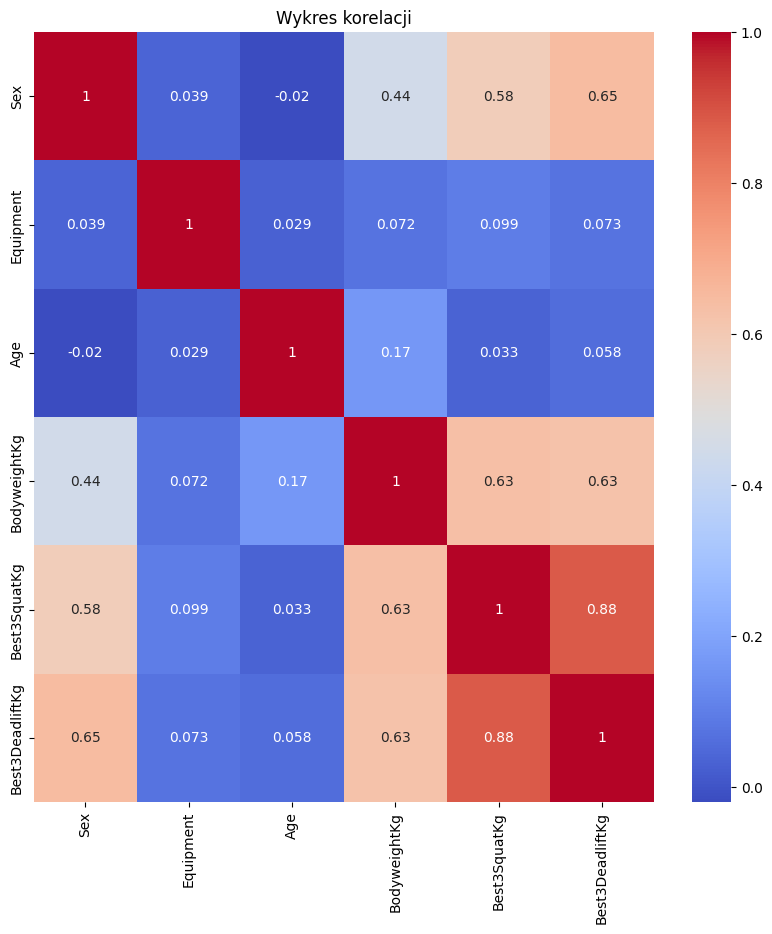

In [738]:
correlation_matrix = X.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Wykres korelacji')
plt.show()

Jak widać z macierzy korelacji głowne czynniki mające wpływ na wynik maksymalnego ciężaru podniesionego na ławce płaskiej mają wyniki z 2 pozostałych ćwiczeń pomimo angażowania w większości całkowicie innych części ciała

Wykorzystanie odwrotnej do macierzy korelacji w celu wskazania zmiennych które są ze sobą nadmiernie skorelowane co może wskazywać na współliniowość <br>
__Współliniowość__ to sytuacja gdy któryś z parametrów jest mocno skorelowany z pozostałymi parametrami co może powodować pogorszenie modelu. Pomimo wysokiej korelacji pomiędzy __Best3SquatKg__ oraz __Best3DeadliftKg__ to i tak każda ze zmiennych zachowała podany próg wynoszący 10 <br> <br>

Próg 10 został wybrany na podstawie danych z prezentacji oraz informacje z artykułu dr inż. Ewa Pośpiech gdzie cytując
,,Przyjmuje się, że z zestawu zmiennych należy usunąć tę zmienną, dla której 
wartość na głównej przekątnej przekracza liczbę 10 (w przypadku kilku takich 
wartości, wybiera się największą z nich). Zredukowany zbiór zmiennych poddaje się dalszej analizie – dla macierzy współczynników korelacji (bez usuniętej 
zmiennej) ponownie wyznacza się odwrotną macierz korelacji i bada się elementy diagonalne. Kolejna największa, większa od 10, wartość wskazuje zmienną, 
którą usuwa się ze zbioru zmiennych. Procedurę kontynuuje się do momentu 
uzyskania na głównej przekątnej macierzy odwrotnej do macierzy współczynników korelacji elementów mniejszych od 10 [Dziechciarz, red., 2002]."

Kiedy wartość z macierzy odwrotnej do macierzy korelacji jest wyższa niż zmienna __treshold__ nazwa zmiennej trafia do listy zmiennych do usunięcia

In [739]:
# Obliczenie macierzy korelacji
correlation_matrix = X.corr()

# Obliczenie macierzy odwrotnej
inverse_correlation_matrix = np.linalg.inv(correlation_matrix)

# Usuwanie zmiennych 
threshold = 10
variables_to_remove = []

for i in range(len(inverse_correlation_matrix)):
    if inverse_correlation_matrix[i, i] > threshold:
        variables_to_remove.append(X.columns[i])

# Usunięcie zmiennych i przypisane nowej ramki danych do ramki danych
X_filtered = X.drop(variables_to_remove, axis=1)

print("Zmienne do usunięcia:", variables_to_remove)
print("Dane po usunięciu zmiennych:")
print(X_filtered)

# Ponowne przypisane do tabeli X kolumn ze mnienne X_filtered
X = X_filtered

Zmienne do usunięcia: []
Dane po usunięciu zmiennych:
         Sex  Equipment   Age  BodyweightKg  Best3SquatKg  Best3DeadliftKg
0        0.0        1.0  33.0         58.30          80.0            107.5
1        0.0        1.0  43.0         73.10         105.0            110.0
2        1.0        1.0  15.5         67.40         100.0            105.0
3        1.0        1.0  35.0         66.65         137.5            170.0
4        1.0        1.0  26.5         72.45          90.0            125.0
...      ...        ...   ...           ...           ...              ...
3030196  0.0        2.0  32.0         95.00         260.0            227.5
3030197  0.0        2.0  45.0        109.30         242.5            215.0
3030198  0.0        2.0  27.5        113.22         237.5            200.0
3030199  0.0        2.0  37.5        110.79         227.5            190.0
3030200  0.0        2.0  39.5        124.53         220.0            145.0

[1144676 rows x 6 columns]


Usunięcie zmiennych quasi-stałych <br>
Wykorzystaliśmy do tego współczynnik zmienności który obliczamy z nastepującego wzoru <br>
$$
v=\frac{s}{\overline{x}}
$$
- s - odchylenie standardowe z próby
- $\overline{x}$ – średnia arytmetyczna z próby. <br>
Ustawiliśmy go na 15% czyli 0.15

In [740]:
# Obliczenie współczynnika zmienności 
cv = X.std() / X.mean()

# Ustawienie progu poniżej którego uznajemy zmienne za zmienne quasi-stałe
cv_threshold = 0.15 

# Znalezienie kolumn posiadających bardzo niski współczynnik zmienności
low_cv = X.columns[cv < cv_threshold]

# Usunięcie zmiennych quasi stałych
X_filtered = X.drop(low_cv, axis=1)

print("Zmienne quasi-stałe usunięte na podstawie współczynnika zmienności:", low_cv)

# Ponowne przypisane do tabeli X kolumn ze mnienne X_filtered
X = X_filtered

Zmienne quasi-stałe usunięte na podstawie współczynnika zmienności: Index([], dtype='object')


## 3 Przygotowanie modelu regresji przy pomocy XGBoost

#### Kwestie teoretyczne 
Struktura wykorzystywana w klasyfikacji lub regresji. <br> Używane są w celu pomocy w obliczeniach gdzie ciężki do ustalenia jest logiczny algorytm do obliczania lub klasyfikowania danych. <br> Składa się ono z  warunków które mają za cel jak najdokładniejsze ustalenie zależności pomiędzy podanymi danymi, a otrzymanym wynikiem <br>
Składa się ono z się z **korzenia** (*root*), **węzłów** (*nodes*) i **liści** (*leaves*) <br>
<img src="https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png" alt="Drzewo decyzyjne" width="800"> <br>
*Przykład prezentuje umowny schemat określający ryzyko zawału serca*
<br> <br>
Działanie drzew przypomina zbiór bramek logicznych gdzie przy klasyfikacji możliwa jest ona przy spełnianiu tylko jednego z warunków <br> Widać to dobrze na poniższym przykładzie. W celu oddzielenia punktów niebieskich od czerwonych stosuje się kilka warunków na osi *x<sub>1</sub> i x<sub>2</sub>* w postaci linii *p<sub>1</sub>*, *p<sub>2</sub>*, *p<sub>3</sub>*, *p<sub>4</sub>* które rozdzielają dwa typy punktów. <br> <br>
Dzięki tym 4 liniom możliwe jest wyznaczenie obszarów dla których funkcja przyjmuje poszczególne wartości i oddziela od siebie 2 typy punktów <br>
Drzewo to posiada **głębokość** wynoszącą 3 na co przypada korzeń na głębokości równej 0, a dla każdego rozgałęzienie wartość parametru rośnie <br>
Według tej zasady węzeł 1 czyli **korzeń** należy do poziomu 0, węzeł 2 i 3 do poziomu 1

Oczywiście przykład jest bardzo prosty i zawiera tylko dwa parametry x, ale pokazuje sposób działania drzewa poprzez tworzenie listy warunków które w zależności od spełniania poszczególnych z nich 

<img src=Images/Drzewo.png alt="Tekst zastępczy" width="800"> <br>
*Przykład sposobu generowania kolejnych podziałów tworzących drzewo decyzyjne*
<br>
<br>

<img src=Images/Drzewo2.png alt="Tekst zastępczy" width="800">> <br>
*Utworzone drzewo decyzyjne z podglądem na sposób dzielenia zbioru*
<br><br>
***Kryterium wyboru testu*** <br>
Czynnikiem który odgrywa kluczowe znaczenie przy tworzeniu drzewa decyzyjnego jest tzw. Kryterium wyboru testu które odpowiada za sposób w jaki drzewo decyzyjne podejmuje decyzje o tworzeniu kolejnych rozgałęzień. <br> Najpopularniejsze przy rozwiazywaniu problemów klasyfikacji to kryterium entropii <br>

***Entropia*** 
<center>

_g<sub>t</sub>(P) = I(P) - E<sub>t</sub>(P)_

</center>

***E<sub>t</sub>(P)*** oznacza stopień nieuporządkowania lub niepewności w zbiorze.<br>
W drzewie decyzyjnym służy jako kryterium na podstawie którego tworzony jest podział dążąc do minimalnej niepewności. Nieuporządkowanie danych możemy interpretować jako stopień losowości danych co powoduje wyraźne trudności z wyciągnięciem istotnych informacji <br> <br>
***I(P)*** oznacza to różnorodność, zmienność lub zróżnicowanie wartości w danym zbiorze danych. Im większa jest ta informacja, tym bardziej różnorodne lub bardziej zróżnicowane są dane, co może potencjalnie dostarczyć więcej wiedzy lub informacji przy analizie tych danych.  <br>
Entropia stanowi miarę informacji związanej z danym zjawiskiem, które losowo przyjmuje n stanów. Również oznacza średnią ilość informacji niezbędną do zapamiętania faktu, że dane zjawisko przyjmuje jeden z dostępnych *n* stanów.

**XGBClassifier** to algorytm tworzy kolejne drzewa które wykorzystując tak zwane wzmocnienie gradientowe gdzie przy wykorzystaniu pochodnych korygowane są błędy kolejnych generowanych drzew. Każde kolejne drzewo jest tworzone, aby poprawić błędy wcześniejszych drzew, co prowadzi do postawania skorelowanych drzew. Jest to budowanie w sposób sekwencyjny mający na celu skorygowanie błędów poprzednich modeli. <br>
XGBClassifier nie posiada wyboru kryterium do jakości oceny podziałów ponieważ domyślnie wykorzystuje **Gradient Boosting** - w tym wypadku iteracyjna forma dodawania kolejnych drzew decyzyjnych co skutkuje stopniową poprawą wyniku. Każde następne drzewo ma na celu lekką korektę względem poprzedniego drzewa. Oczywiście tak jak w przypadku pozostałych modeli, zbyt duża ilość drzew może prowadzić do przeuczenia<br>
<br>

<img src="Images/Porownanie_drzew.png" alt="Tekst zastępczy" width="800" > <br>
*Porównanie pojedyńczego drzewa, lasu losowego oraz wzmocnienia gradientowego*


Podzial danych na dane treningowe oraz walidacyjne w celu późniejszego przygotowania modelu regresji
- dane treningowe __X_train__ i __Y_train__ służące do nauczenia modelu wyliczania zmiennej __y__ na podstawie kolumn z tabeli __X__
- dane walidacyjne __X_valid__ i __Y_valid__ służące do przetestowania jak dobrze model radzi sobie z wyliczaniem wartości zmiennej y

In [741]:
from sklearn.model_selection import train_test_split

X_train,  X_valid, Y_train,  Y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Sex,Equipment,Age,BodyweightKg,Best3SquatKg,Best3DeadliftKg
1635889,1.0,2.0,51.5,63.20,130.00,130.00
1853829,0.0,1.0,9.5,42.20,52.50,70.00
1634703,1.0,1.0,23.5,92.90,210.00,235.00
2060092,1.0,1.0,29.0,67.40,122.50,142.50
899307,0.0,2.0,16.5,76.66,131.54,142.88
...,...,...,...,...,...,...
309678,1.0,5.0,36.0,137.25,235.00,270.00
487807,0.0,1.0,17.5,100.45,125.00,150.00
341601,1.0,1.0,23.5,65.94,180.00,232.50
1766092,0.0,1.0,21.0,58.55,70.00,100.00


Import funkcji __XGBRegressor__ z pakietu __xgboost__ oraz funkcji __mean_absolute_percentage_error__ i __mean_absolute_error__ z pakietu sklearn <br>
- __XGBRegressor__ - funkcja odpowiadająca za regresję przy użycia drzew losowych korygowanych za pomocą wzmocnienia gradientowego
- __mean_absolute_percentage_error__ oraz __mean_absolute_error__ - miary za pomocą których określamy jak dokładne wyniki otrzymujemy z przygotowanego modelu


Z danych walidacyjnych wybieramy sampla w postaci 500 elementów na których przeprowadzane będą testy

In [742]:
df_valid = pd.concat([Y_valid,X_valid], axis=1)
df_valid = df_valid.sample(500)
Y_valid = df_valid['Best3BenchKg']
X_valid = df_valid.drop('Best3BenchKg', axis=1)

from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=1, n_estimators=200, learning_rate=0.11, n_jobs=6)
xgb_model.fit(X_train, Y_train)
predictions = xgb_model.predict(X_valid)

## 4 Ocena przygotowanego modelu przy pomocy metryk

Porównanie danych uzyskanych za pomocą regresji oraz oraz oryginalnych danych ze zbioru <br>
Prognoza przeprowadzana jest przy pomocy danych ze zbioru które nie zostały użyte do przygotowywania modelu <br>
Obliczenie średniego błędu kwadratowego oraz średniego procentowego błędu kwadratowego w celu wstepnej weryfikacji dokładności modelu

#### 4.1 Średni procentowy błąd kwadratowy i Średni błąd kwadratowy

In [743]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score
predicted_values_reset = pd.DataFrame(predictions, columns=['Predictions'])
y_reset = Y_valid.reset_index(drop=True)
result_df = pd.concat([y_reset, predicted_values_reset], axis=1)
print(result_df, '\n')

print('Średni procentowy błąd kwadratowy', mean_absolute_percentage_error(Y_valid, predictions))
print('Średni błąd kwadratowy', mean_absolute_error(Y_valid, predictions))

     Best3BenchKg  Predictions
0          137.50   112.374588
1           55.00    75.130592
2          155.00   156.774857
3          156.49   157.838425
4          217.50   191.960434
..            ...          ...
495         92.50    88.196335
496        100.00   107.328468
497         62.50    57.718525
498         85.00    99.424629
499         52.50    54.141880

[500 rows x 2 columns] 

Średni procentowy błąd kwadratowy 0.1045617796775612
Średni błąd kwadratowy 11.710158097229005


#### 4.2 Współczynnik determinacji

In [744]:
r2 = r2_score(Y_valid, predictions)
print('Wskaźnik R-kwadrat:', r2)

Wskaźnik R-kwadrat: 0.8924562252633415


Interpetacja wyników wskaźnika R-kwadrat
- 0: Oznacza to, że model nie wyjaśnia żadnej zmienności w danych i jest bezużyteczny w przewidywaniu rzeczywistych wartości.

- liski 1: Wartość R-kwadrat bliska 1 wskazuje, że model doskonale dopasowuje się do danych, a jego przewidywania idealnie zgadzają się z rzeczywistymi danymi. To jest jednak rzadkie w praktyce.

- między 0 a 1: Im wyższa wartość R-kwadrat, tym lepiej model dopasowuje się do danych. Na przykład, R-kwadrat równy 0,80 oznacza, że 80% zmienności w danych jest wyjaśniane przez model, a pozostałe 20% to błąd modelu.

- jemny: Teoretycznie R-kwadrat może być ujemny, ale jest to rzadki przypadek. Oznacza to, że model jest tak słaby, że jego przewidywania są gorsze niż średnia wartość danych. <br>

W naszym wypadku wynik wynosi pomiędzy 80-90 procent w zależności od sampla od wylosowanych 500 przykładowych danych od w związku z czym model dobrze model regresji dopasowuje się do danych

#### 4.3 Średni błąd kwadratowy

In [745]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_valid, predictions)
print('Średni błąd kwadratowy (MSE):', mse)

Średni błąd kwadratowy (MSE): 248.08843227504326


Średni błąd kwadratowy (Mean Squared Error - MSE) jest jedną z podstawowych miar oceny modeli regresji. MSE mierzy średnią kwadratową różnicę między przewidywanymi wartościami a rzeczywistymi wartościami.
Jest to jedna z podstawowych metod porównywania jak różne modele radzą sobie z obliczaniem wartości z różnych zbiorów danych ponieważ ciężko jednoznacznie stwierdzić czy wynik wynoszący przykładowo 249 jak u nas jest tak naprawdę wynikiem wysokim czy niskim

#### 4.4 Pierwiastek błędu średniokwadratowego

In [746]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_valid, predictions))
print('Pierwiastek błędu średniokwadratowego (RMSE):', rmse)

Pierwiastek błędu średniokwadratowego (RMSE): 15.750823225312487


Głowna różnica RMSE polega na fakcie, że na waga błędów: MSE bardzo karze model w ocenie za większe błędy bardziej niż RMSE, ponieważ błędy są podnoszone do kwadratu. RMSE, jako pierwiastek kwadratowy z MSE, ma tendencję do bardziej równomiernego traktowania różnych błędów.
- przy resztach wynoszących 10 i 10 MSE wyniesie 100 a RMSE 10 
- analogicznie przy resztach wynoszących 20 i 1 MSE wyniesie 401 a RMSE 10.5 <br> <br>
Analogicznie oceniając dwa modele gdzie jeden ma wyższe MSE a drugi RMSE pierwszy z reguły popełnia większe błędy, natomiast drugi pomimo przeciętnie niższych błędów może mieć okazjonalnie wyższe odchylenia błędow
RMSE jest kolejną z miar za pomocą której możemy porownywać utworzone modele w obrębie danych 


#### 4.5 Współczynnik zmienności

In [747]:
import numpy as np

def coefficient_of_variation(data):
    mean = np.mean(data)
    std_deviation = np.std(data)
    
    if mean == 0:
        return 0

    cv = (std_deviation / mean) * 100
    return cv

cv_predictions = coefficient_of_variation(predictions)
print('Współczynnik zmienności danych obliczonych przez model:', cv_predictions, '%')
cv_predictions = coefficient_of_variation(Y_valid)
print('Współczynnik zmienności danych walidacyjnych:', cv_predictions, '%')

Współczynnik zmienności danych obliczonych przez model: 37.93843388557434 %
Współczynnik zmienności danych walidacyjnych: 40.21584395502366 %


Według danych ze strony nasz współczynnik zmenności wynoszący około 40% można uznać za przeciętną zmienność. <br>
Współczynnik zmenności danych rzeczywistych i obliczonych przez model jest zbliżona czyli rożnica na pozimie (max 3-4 procent w skali około 40) więc może być to kolejny z dowodów na dobre odwzorowywanie danych przez model

https://obliczeniastatystyczne.pl/wspolczynnik-zmiennosci/

#### 4.6 Współczyynnik determinacji

In [748]:
from sklearn.metrics import r2_score
import numpy as np

r2 = r2_score(Y_valid, predictions)

n = len(Y_valid)
p = 6

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Skorygowany współczynnik determinacji (Adjusted R-squared):', adjusted_r2)
print('Współczyynnik determinacji:', r2)

Skorygowany współczynnik determinacji (Adjusted R-squared): 0.8911473760779054
Współczyynnik determinacji: 0.8924562252633415


Główna różnica względem wspólczynnika determinacji polega na tym, że skorelowany współczynnik determinacji uwzględnia złożoność modelu i liczbę zmiennych niezależnych, co czyni go bardziej odpowiednim narzędziem do oceny jakości modelu regresji w przypadku modeli o dużej ilośći zmiennych niezaleznych. <br>
Przy okazji wartosć skorelowanego współczynnika determinacji z reguły jest minimalnie niższa niż współczynnika determinacji <br>

#### 4.7 Współczynnik korelacji

In [749]:
print('W nasszym wypadku:')
print('Współczynnik korelacji', r2)
print('Skorelowany współczynnik korelacji', adjusted_r2)

W nasszym wypadku:
Współczynnik korelacji 0.8924562252633415
Skorelowany współczynnik korelacji 0.8911473760779054


#### 4.8 Błąd oszacowania parametrów

In [750]:
residuals = predictions - Y_valid
n = len(residuals) 
k = 6

SSE = np.sum(residuals**2)

SE = np.sqrt(SSE / (n - k - 1))

print(f'Błąd oszacowania parametrów (SE): {SE:.4f}')

Błąd oszacowania parametrów (SE): 15.8623


#### 4.9 Variance Inflation Factor

Wzór na błąd oszacowania parametrów (SE) jest używany do obliczenia, jak dokładnie model regresji estymuje swoje parametry (współczynniki nachylenia i wyraz wolny), uwzględniając liczbę predyktorów i reszty modelu. Jest to miara dokładności oszacowań parametrów, a niższa wartość SE oznacza dokładniejsze oszacowania. <br>
Tak samo jak Skorygowany współczynnik determinacji bierze pod uwagę ilość kolumn z których wyliczana jest zmienna Y

In [751]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = X_valid

data['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

          Variable        VIF
0              Sex   1.841298
1        Equipment   1.024430
2              Age   1.054248
3     BodyweightKg   1.620551
4     Best3SquatKg   5.223618
5  Best3DeadliftKg   5.999228
6        Intercept  23.728091


Dane z modelu pozytywnie przeszły test vif odpowiedzialny za Variance Inflation Factor ponieważ pomiędzy zmiennymi wystepuje pewna współliniowość, ale nie przekraca ona wartości 10 więc nie model nie wymaga korekty <br>
Z powodu na brak dodawania domyslnie przez pythona dodatkowej kolumny ze stałą jest ona dodana jako Intercept <br>

https://github.com/kennethleungty/Logistic-Regression-Assumptions/issues/2

#### 4.10 Badanie istotności poszczególnych współczynników 

Badanie istotności poszczególnych współczynników przy pomocy wbudowanej funkcji __plot_importance__ za pomocą której sprawdzimy: <br>

- Weight (waga): liczba razy, kiedy dana cecha została użyta do podziału danych w wszystkich drzewach. Cecha używana częściej jest uważana za ważniejszą.
- Gain (przyrost): średni przyrost spowodowany przez cechę w drzewach. Gain uwzględnia, jak bardzo dana cecha przyczyniła się do poprawy modelu przy każdym podziale, gdzie została użyta.
- Cover (pokrycie): średnia liczba próbek dotkniętych przez podziały, które używają danej cechy. Oznacz to że __cover__ pokazuje ile próbek było poddanych podziałowi np podział na podstawie cechy f1 powoduje średnio udział 250 elementów w podziale

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

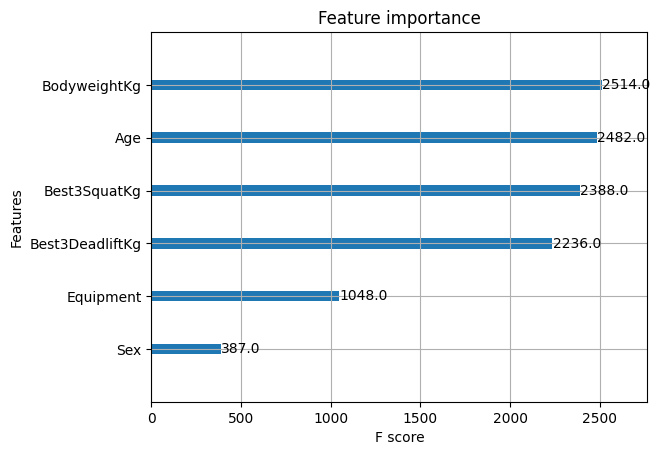

In [752]:
# Weight
import xgboost as xgb
xgb.plot_importance(xgb_model)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

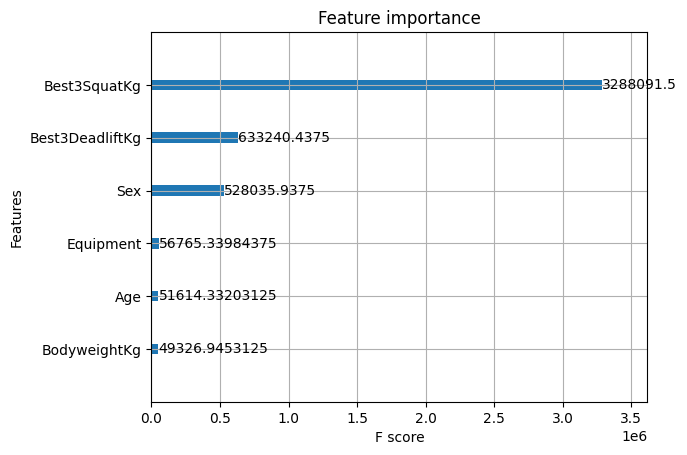

In [753]:
# Gain
import xgboost as xgb
xgb.plot_importance(xgb_model,importance_type='gain')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

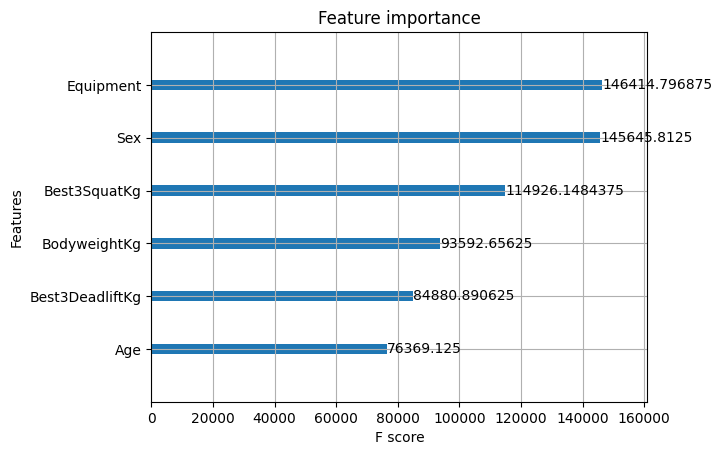

In [754]:
# Cover
import xgboost as xgb
xgb.plot_importance(xgb_model,importance_type='cover')

Przykładowe dane pasujące do naszego kolegi <br>
Jak widać na podstawie wpisanych danych obliczany jest jego wynik jako __prediction__

In [755]:
input_data2 = [[1, 2, 22, 250, 200, 110]]

a1 = xgb_model.predict(input_data2)

print("Prediction:", a1)

Prediction: [155.0307]


Odjęcie od przewidzianych wartości, wartości prawdziwych

In [756]:
result_df['residuals'] = result_df['Predictions'] - result_df['Best3BenchKg']

In [757]:
df_valid.to_csv('Prognoza')

In [758]:
predictions.size

500

Wykres przedstawiający jakie jakie wartości przyjęły poszczególne reszty w stosunku do przewidywań

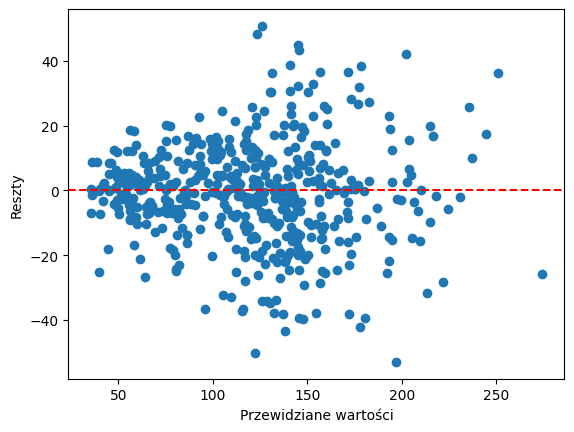

In [759]:
# Wykres reszt
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Przewidziane wartości')
plt.ylabel('Reszty')
plt.show()

Wykres porównujący rozkład reszt z teoretycznym rozkładenm nromalnym

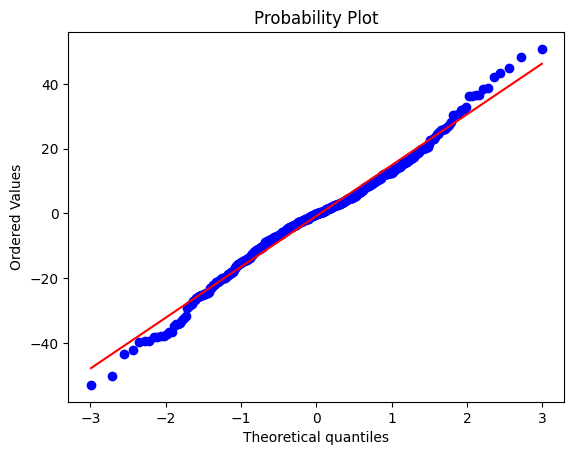

In [760]:
# Wykres Q-Q
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

## 5 Testy statystyczne

#### 5.1 Test Omegi kwadrat
Wykonanie testu symetrii za pomocą testu Omegi kwadrat

In [761]:
import statsmodels.api as sm

symmetry_test = sm.stats.stattools.omni_normtest(residuals)

alpha = 0.05
statistic = symmetry_test[0]
p_value = symmetry_test[1]

print("Test na symetrię reszt:")
print(symmetry_test)
print("\nInterpretacja:")
print(f"Statystyka testowa: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Odrzucamy hipotezę zerową.")
    print("Wniosek: Dane nie pochodzą z rozkładu  symetrycznego.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej.")
    print("Wniosek: Dane mogą pochodzić z rozkładu symetrycznego. ")

Test na symetrię reszt:
NormaltestResult(statistic=9.176384864784197, pvalue=0.010171226947511583)

Interpretacja:
Statystyka testowa: 9.176384864784197
P-value: 0.010171226947511583
Odrzucamy hipotezę zerową.
Wniosek: Dane nie pochodzą z rozkładu  symetrycznego.


Ponieważ p-value jest mniejsze niż próg istotności (α = 0.05), odrzucasz hipotezę zerową, co oznacza, że dane nie pochodzą z rozkładu symetrycznego. Wskazuje to na potencjalne problemy z założeniem normalności reszt w modelu. <br>
Test Omegi kwadrat
testujący czy wykres jest symetryczny
W związku z brakiem symetryczności rozkładu postanwoiliśmy narysować histogram dla wykresu reszt z wartościami zaokrąglonymi do liczba całkowitch


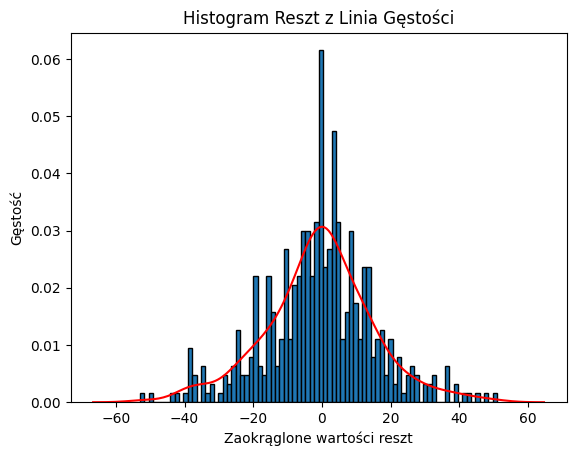

In [762]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_round = round(residuals)

plt.hist(residuals_round, bins=residuals_round.nunique(), edgecolor='black', density=True)
sns.kdeplot(residuals_round, color='red')

plt.title('Histogram Reszt z Linia Gęstości')
plt.xlabel('Zaokrąglone wartości reszt')
plt.ylabel('Gęstość')

plt.show()

#### 5.2 Test serii
Test serii przeznaczony do  analizy reszt w modelach regrsyjnych <br>
Test ten służy do sprawdzenia losowości sekwencji czyli losowości elementów

In [763]:
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp

p_value = runstest_1samp(residuals, correction=False)[1]

print(f"P-value dla testu serii: {p_value}")

# Interpretacja wyników testu
alpha = 0.05
if p_value < alpha:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej.")
    print("Istnieje statystycznie istotna nielosowość w sekwencji reszt.")
else:
    print("Odrzucamy hipotezę zerową.")
    print("Brak dowodów na nielosowość w sekwencji reszt.")

P-value dla testu serii: 0.9767949388813809
Odrzucamy hipotezę zerową.
Brak dowodów na nielosowość w sekwencji reszt.


Nie odrzucamy hipotezy zerowej (p-value > 0.05), co oznacza, że nie ma dowodów na nielosowość w sekwencji reszt. To wskazuje na brak autokorelacji w resztach.

#### 5.3 Test Goldfelda-Quandta na heteroskedastyczność
Test na heteroskedatyczność <br>
Heteroskedastyczność w analizie regresji występuje, gdy zmienność błędów (reszt) modelu nie jest stała w całym zakresie zmiennych niezależnych. <br>
Jest to często wynik nierównomiernego rozkładu zmiennej zależnej w zależności od wartości zmiennych niezależnych, co może prowadzić do niedokładności w estymacji i błędnych wniosków statystycznych.

In [764]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

X_valid_const = sm.add_constant(residuals_sample['Best3BenchKg'])

gq_test = het_goldfeldquandt(residuals, X_valid_const)

print("\nTest Goldfelda-Quandta na heteroskedastyczność:")
print(gq_test)

# Interpretacja wyników testu Goldfelda-Quandta
gq_statistic, gq_p_value, _ = gq_test  # _ jest używane do zignorowania trzeciej wartości

print("\nInterpretacja:")
print(f"Statystyka testu: {gq_statistic}, p-wartość: {gq_p_value}")

alpha = 0.05  # Poziom istotności

if gq_p_value < alpha:
    print("Odrzucamy hipotezę zerową.")
    print("Wniosek: Istnieje heteroskedastyczność w resztach.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej.")
    print("Wniosek: Nie ma dowodów na istnienie heteroskedastyczności w resztach.")


Test Goldfelda-Quandta na heteroskedastyczność:
(1.0883607207515202, 0.2527241092960456, 'increasing')

Interpretacja:
Statystyka testu: 1.0883607207515202, p-wartość: 0.2527241092960456
Nie ma podstaw do odrzucenia hipotezy zerowej.
Wniosek: Nie ma dowodów na istnienie heteroskedastyczności w resztach.


Nie ma podstaw do odrzucenia hipotezy zerowej (p-value > 0.05), co oznacza brak dowodów na istnienie heteroskedastyczności w resztach.

#### 5.4 Test na normalność Kołmogorowa-Smirnowa
Test Kołmogorowa-Smirnowa jest statystycznym testem używanym do sprawdzania, czy dane pochodzą z rozkładu normalnego. Test ten porównuje empiryczny rozkład danych z teoretycznym rozkładem normalnym i generuje statystykę testową oraz p-wartość, która pozwala na ocenę, czy dane są zgodne z rozkładem normalnym.

In [765]:
ks_statistic, p_value = stats.kstest(residuals, 'norm')

print("\nTest Kołmogorowa-Smirnowa na normalność:")
print(f"Statystyka testowa: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  
# Interpretacja wyników testu
print("\nInterpretacja dla poziomu istotności 0.05:")
if p_value < alpha:
    print("Odrzucamy hipotezę zerową.")
    print("Wniosek: Istnieją istotne różnice między rozkładem reszt a rozkładem normalnym.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej.")
    print("Wniosek: Brak istotnych różnic między rozkładem reszt a rozkładem normalnym.")


Test Kołmogorowa-Smirnowa na normalność:
Statystyka testowa: 0.41795536797440647
P-value: 1.2212037504357821e-79

Interpretacja dla poziomu istotności 0.05:
Odrzucamy hipotezę zerową.
Wniosek: Istnieją istotne różnice między rozkładem reszt a rozkładem normalnym.


 Odrzucenie hipotezy zerowej (p-value < 0.05) wskazuje na istnienie istotnych różnic między rozkładem reszt a rozkładem normalnym. To sugeruje problem z normalnością reszt.

#### 5.5 Test autokorelacji Durbin-Watsona
Test autokorelacji Durbin-Watsona to narzędzie statystyczne używane do sprawdzania występowania autokorelacji w błędach rezydualnych modelu regresji. Test ten dostarcza informacji o tym, czy błędy są niezależne lub czy istnieją pewne wzorce korelacji między nimi, co może wpłynąć na poprawność wyników analizy regresji.

In [766]:
dw_statistic = sm.stats.durbin_watson(residuals)

print("Test Durbin-Watsona:")
print(f"Statystyka testowa: {dw_statistic}")

# Interpretacja wyników testu Durbin-Watsona
if dw_statistic < 1.5:
    print("Wskazówki na dodatnią autokorelację.")
elif dw_statistic > 2.5:
    print("Wskazówki na ujemną autokorelację.")
else:
    print("Brak wyraźnych dowodów na autokorelację.")

Test Durbin-Watsona:
Statystyka testowa: 2.0310782470708486
Brak wyraźnych dowodów na autokorelację.


Wynik testu mieści się w przedziale od 1.5 do 2.5, co oznacza brak wyraźnych dowodów na autokorelację reszt.

## 6 Eksport tabeli z prognozą

In [768]:
df_valid['Prognoza'] = predictions

In [770]:
df_valid.to_csv('Prognoza')

Z racji na ogromną ilośc ramki danych użytej do budowy modelu wybraliśmy sampla z przykładowymi 10k danych w postaci pliku Powerlifting.xlsx

In [ ]:
sample = df.sample(10000)
sample.to_excel('Powerlifting.xlsx')

## 7 Zapis modelu do pliku .joblib

In [773]:
import joblib

In [774]:
joblib.dump(xgb_model, 'bench_press_predictor.joblib')

['bench_press_predictor.joblib']